In [1]:
%matplotlib inline

import os
import sys
import copy
import numpy as np

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
import hdmclouds_v1 as mnew
import hdmclouds_v1x as mold
from utils import *
from graph import *
from preprocessing import *
#from gmr_ import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 13})

#from pycupid import *
import astropy.units as u
from astropy.visualization import AsymmetricPercentileInterval


save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-v1/figures/"

***

In [2]:
fits_path = "../data/cubes/Orion.methanol.cbc.contsub.image.fits"
data,wcs,hdu,freq = load_data(fits_path)
#data,wcs,hdu = load_data(fits_path)

print(wcs)
print("\nShape of array:", data.shape)

/Users/martin/anaconda3/lib/python3.6/site-packages/spectral_cube/cube_utils.py:114: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  stokes_arrays[stokes_names[i_stokes]] = array[array_slice]


WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  
CRVAL : 83.80979166667  -5.376388888889  229763161321.4  
CRPIX : 51.0  51.0  1.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.0001111111111111  0.0001111111111111  -488336.1207886  
NAXIS : 100  100  41

Shape of array: (41, 100, 100)


In [3]:
rms = estimate_rms(data)
print("RMS value",rms)

RMS value 0.6962183893949565


***
# OLD

In [4]:
hdmc1 = mold.HDMClouds(data, freq=freq, n_center=250, back_level=rms, wcs=wcs, verbose=True)

[INFO] Number of usable pixels: 17411


----------------------------------------------------------------------------------------------------------------------
ORIGINAL DATA


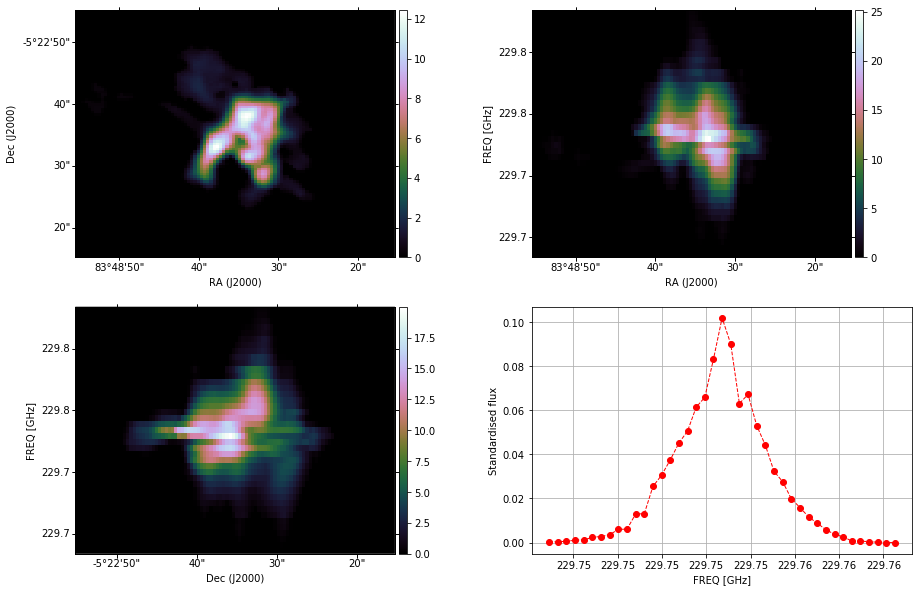

----------------------------------------------------------------------------------------------------------------------
GAUSSIAN MIXTURE


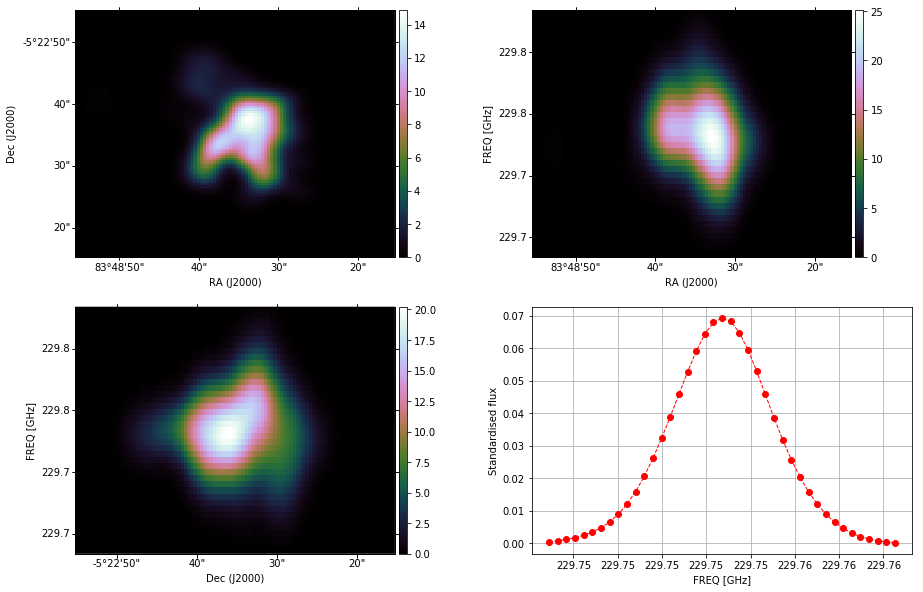

----------------------------------------------------------------------------------------------------------------------
RESIDUAL


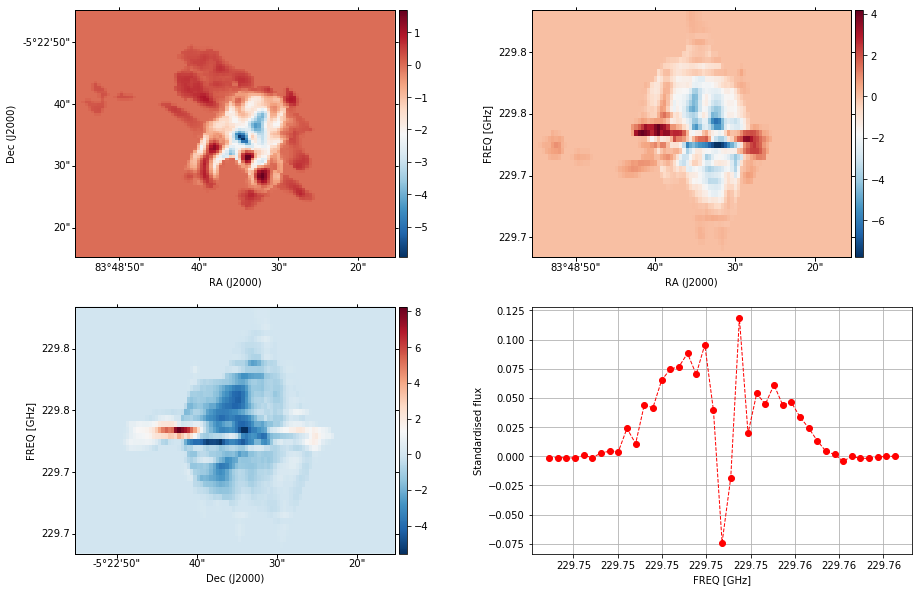

----------------------------------------------------------------------------------------------------------------------
RESIDUAL STATS
RMS of residual: 0.02659652209487355
Inf norm of residual: 0.5046403308844569
Variance of residual: 0.0007044743969857655
Normalized flux addition: 0.21899907294074297
Normalized flux lost: 0.09467256818430818


In [5]:
hdmc1.get_residual_stats();

In [6]:
#hdmc1.build_gmr()

In [7]:
#hdmc1.get_residual_stats()

***
# NEW

In [14]:
hdmc2 = mnew.HDMClouds(data, freq=freq, back_level=rms, wcs=wcs, verbose=True, compression=0.025)

435
[INFO] Number of pixels with significant emission: 17411

Isolated Cloud Entity A: 17264 pixels of significant emission.
Isolated Cloud Entity B: 117 pixels of significant emission.
Isolated Cloud Entity C: 30 pixels of significant emission.
[0]
[[inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
  inf inf inf inf inf inf inf inf inf inf inf]]
[[2147483647 2147483647 2147483647 2147483647 2147483647 2147483647
  2147483647 2147483647 2147483647 2147483647 2147483647 2147483647
  2147483647 2147483647 2147483647 2147483647 2147483647 2147483647
  2147483647 2147483647 2147483647 2147483647 2147483647 2147483647
  2147483647 2147483647 2147483647 2147483647 2147483647]]
##################################################


ValueError: max() arg is an empty sequence

--------------------------------------------------------------------------------------------------------------
ORIGINAL DATA


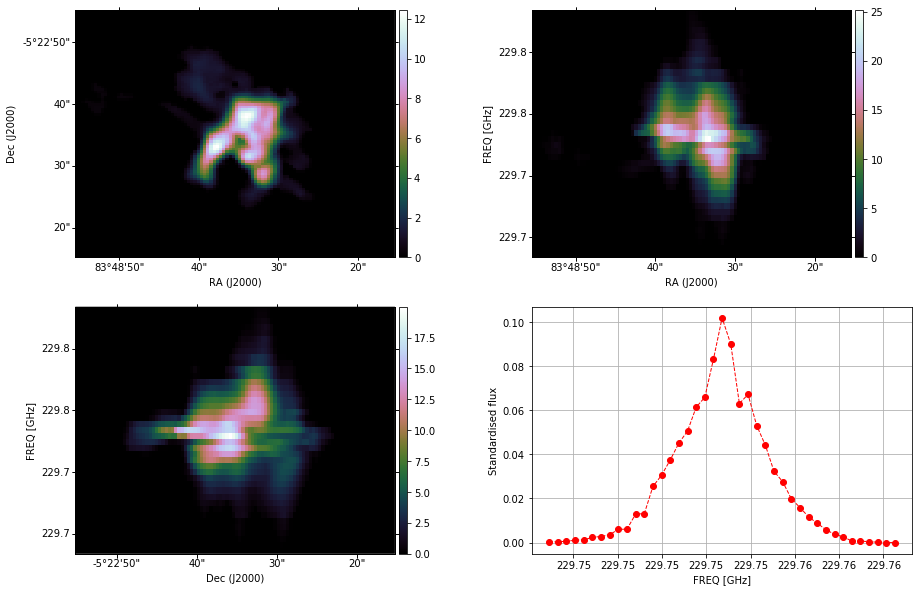

--------------------------------------------------------------------------------------------------------------
GAUSSIAN MIXTURE


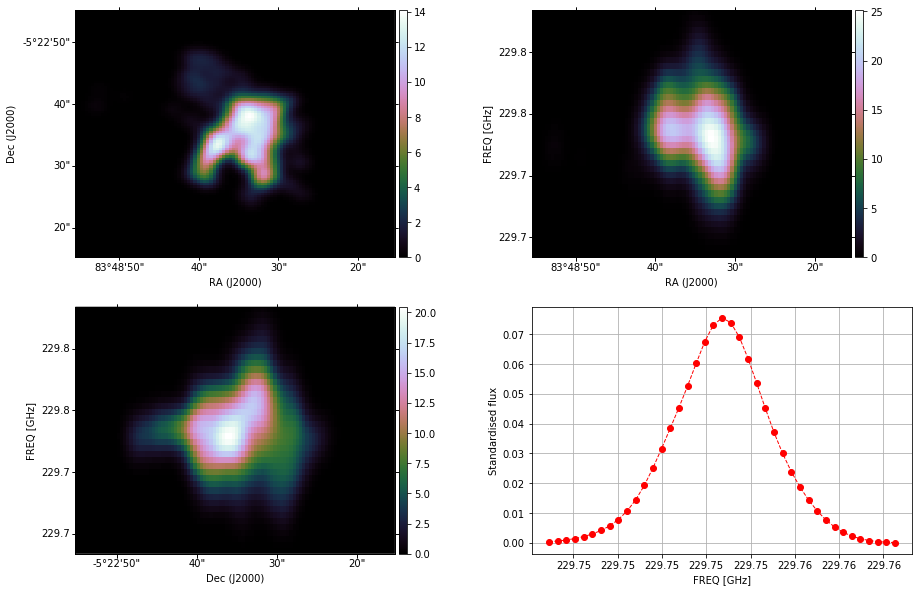

--------------------------------------------------------------------------------------------------------------
RESIDUAL


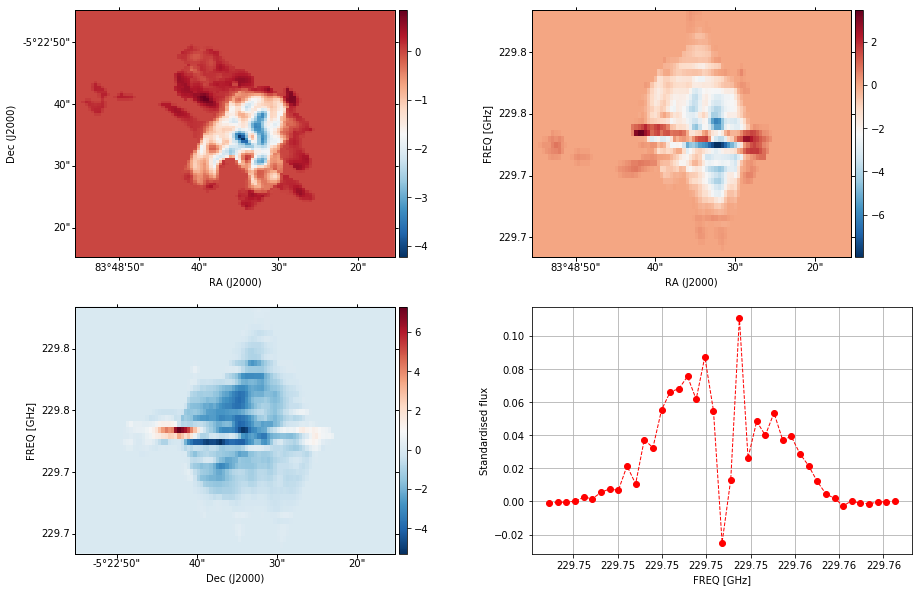

--------------------------------------------------------------------------------------------------------------
RESIDUAL STATS
RMS of residual: 0.022602663660892676
Inf norm of residual: 0.4506555962196228
Variance of residual: 0.0005059163695410544
Normalized flux addition: 0.21761626392435016
Normalized flux lost: 0.05497230815322617


In [9]:
hdmc2.get_residual_stats();

In [10]:
hdmc2.build_gmr()

---------------------------------------------
Building GM for Isolated Cloud Entity A
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.07176928229200559
Inf norm of residual: 0.37017934482426457
Variance of residual: 0.004628534951837453
Normalized flux addition: 0.1157699510793289
Normalized flux lost: 0.04492347004681165




--------------------------------------------------------------------------------------------------------------
ORIGINAL DATA


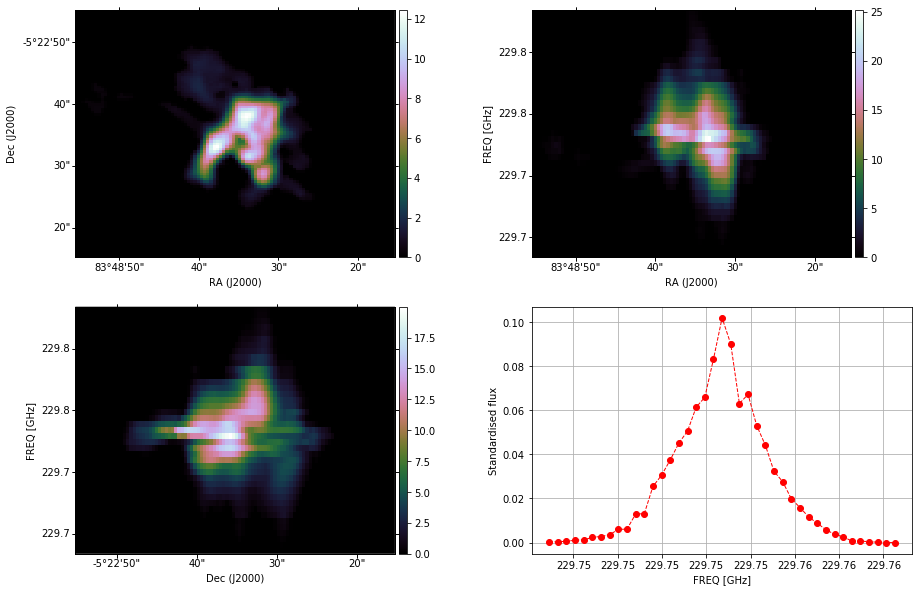

--------------------------------------------------------------------------------------------------------------
GAUSSIAN MIXTURE


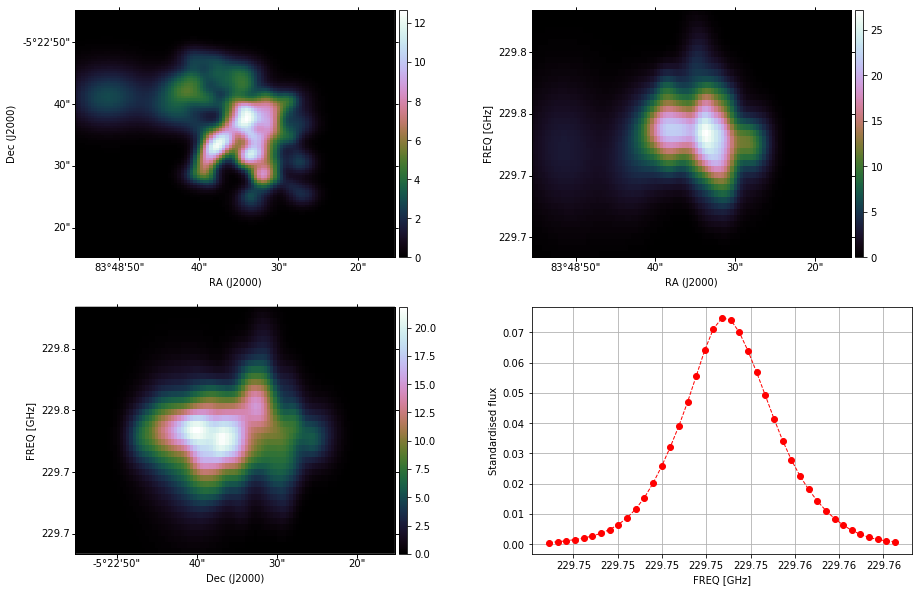

--------------------------------------------------------------------------------------------------------------
RESIDUAL


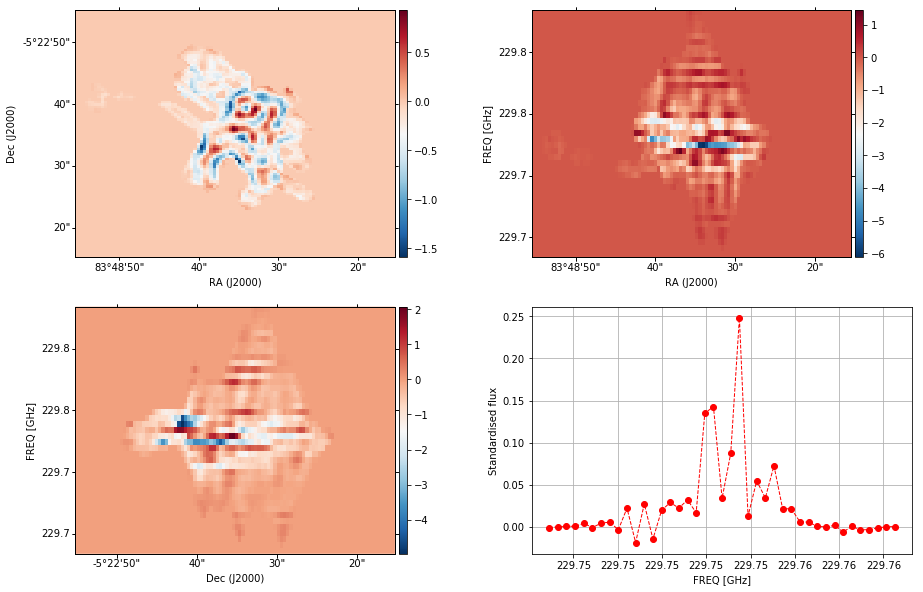

--------------------------------------------------------------------------------------------------------------
RESIDUAL STATS
RMS of residual: 0.014789671668072083
Inf norm of residual: 0.37017934482426457
Variance of residual: 0.0002177925081519689
Normalized flux addition: 0.11576994837409253
Normalized flux lost: 0.044923468932906635


(0.014789671668072083,
 0.0002177925081519689,
 0.11576994837409253,
 0.044923468932906635)

In [11]:
hdmc2.get_residual_stats()

***